Samheeta Mistry -- CSCI467 -- Lab 1
ID: 6382824496

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

Problem 1

1a

In [70]:
### Part 1(a) ###
# Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB).

data2c = "vertebral_column_data/column_2c.dat"
atts = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "spondylolisthesis_grade", "class_labels"]
df2c = pd.read_table(data2c, sep="\s+", names=atts)
df2c.loc[df2c.class_labels == "AB", "class_labels"] = 1
df2c.loc[df2c.class_labels == "NO", "class_labels"] = 0
df2c

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondylolisthesis_grade,class_labels
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


1b (i)

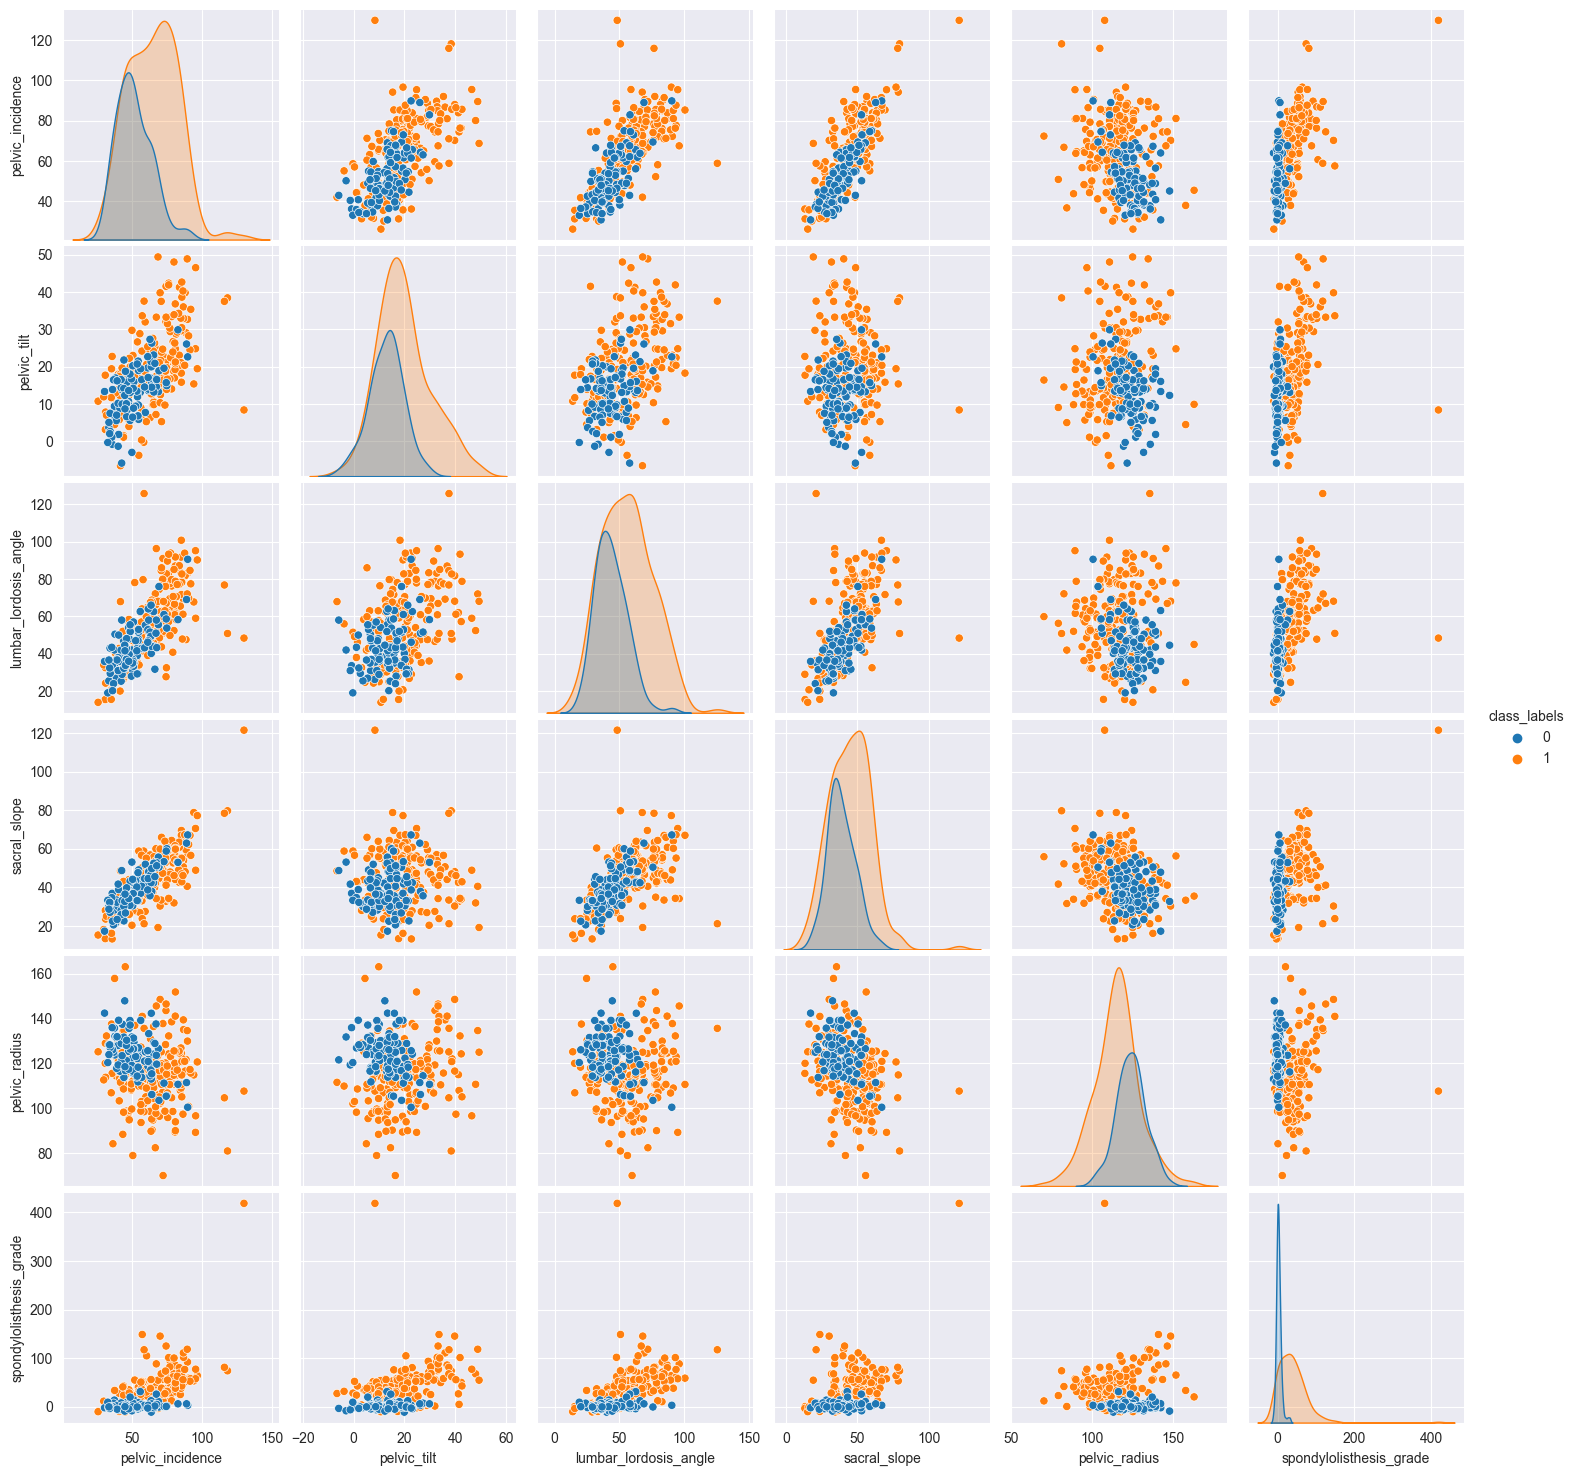

In [71]:
### Part 1(b)(i) ###
sb.pairplot(df2c, hue = "class_labels")

1b (ii)

<AxesSubplot:title={'center':'Class NO'}>

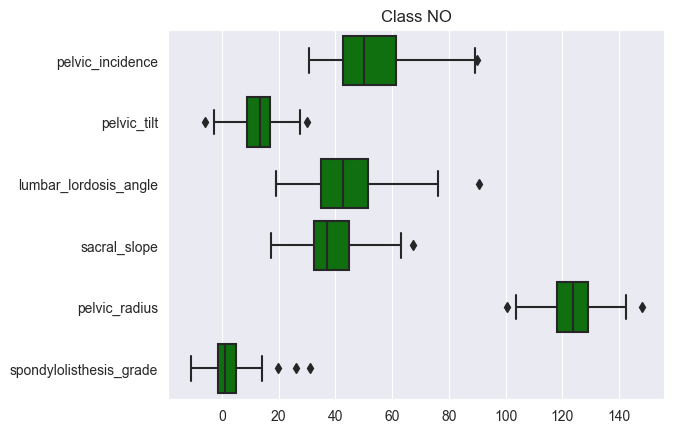

In [72]:
### Part 1(b)(ii) ###
ax0 = sns.boxplot(data = df2c[df2c["class_labels"] == 0].drop(columns = ['class_labels']), color= "g", orient="h")
ax0.set_title("Class NO")
ax0

<AxesSubplot:title={'center':'Class AB'}>

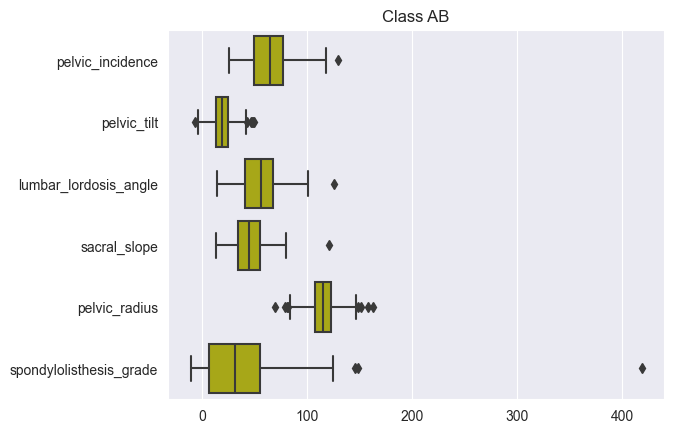

In [73]:
### Part 1(b)(ii) ###
ax1 = sns.boxplot(data = df2c[df2c["class_labels"] == 1].drop(columns = ['class_labels']), color= "y", orient="h")
ax1.set_title("Class AB")
ax1

1b (iii)

In [74]:
### Part 1(b)(iii) ###
trAB = df2c[df2c['class_labels'] == 1].head(140)
trNO = df2c[df2c['class_labels'] == 0].head(70)
te = df2c.drop(pd.concat([trNO, trAB]).index.values)
#test set
te

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondylolisthesis_grade,class_labels
140,69.56,15.40,74.44,54.16,105.07,29.70,1
141,89.50,48.90,72.00,40.60,134.63,118.35,1
142,85.29,18.28,100.74,67.01,110.66,58.88,1
143,60.63,20.60,64.54,40.03,117.23,104.86,1
144,60.04,14.31,58.04,45.73,105.13,30.41,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


In [75]:
tr = pd.concat([trNO, trAB])
tr
#train set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondylolisthesis_grade,class_labels
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


1c (i)

In [76]:
### Part 1(c)(i) ###
X = df2c.iloc[:, :6].to_numpy()
y = df2c['class_labels'].to_numpy()
y = LabelEncoder().fit_transform(y)

In [77]:
### Part 1(c)(i) ###
test_x = te.iloc[:, :6].to_numpy()
train_x = tr.iloc[:, :6].to_numpy()
test_y = te['class_labels'].to_numpy()
train_y = tr['class_labels'].to_numpy()

1c (ii)

In [78]:
from sklearn.metrics import f1_score

### Part 1(c)(i) and 1(c)(ii) ###
test_accuracy = []
train_accuracy = []
test_errors = []
train_errors = []
test_pres = []
train_pres = []
precisions = []
k_val = 208
k = []
while k_val > 0:
    k.append(k_val)
    k_val -= 3

for i in k:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(train_x, train_y.astype(int))
    classifier.kneighbors()
    train_predict = classifier.predict(train_x)
    train_pres.append(train_predict)
    test_predict = classifier.predict(test_x)
    test_pres.append(test_predict)
    accu_test = accuracy_score(test_y.astype(int), test_predict)
    accu_train = accuracy_score(train_y.astype(int), train_predict)
    test_accuracy.append(accu_test)
    train_accuracy.append(accu_train)
    test_errors.append(1-accu_test)
    train_errors.append(1-accu_train)
    cm = confusion_matrix(test_y.astype(int), test_predict)


# most suitable k-value for test accuracy has the lowest corresponding test error
print("minimum test error: " + str(min(test_errors)))
ideal_k = k[test_errors.index(min(test_errors))]
print("most suitable k-value: "+ str(ideal_k))
print("test accuracy for k=4: " + str(test_accuracy[test_errors.index(min(test_errors))]) + ", train accuracy for k=4: " + str(train_accuracy[test_errors.index(min(test_errors))]))
cm = confusion_matrix(y_true=test_y.astype(int), y_pred=test_pres[test_errors.index(min(test_errors))].astype(int))
true_negative = cm[0][0] / (cm[0][0]+cm[0][1])
true_pos = cm[1][1]/(cm[1][1]+cm[1][0])
precise = cm[1][1]/(cm[1][1]+cm[0][1])
print("true negative rate = " + str(true_negative))
print("true positive rate = " + str(true_pos))
print("precision = " + str(precise))
f1 = f1_score(y_true = test_y.astype(int), y_pred = test_pres[test_errors.index(min(test_errors))].astype(int))
print("F_1 score = " + str(f1))
print("confusion matrix: ")
print(cm)

minimum test error: 0.06000000000000005
most suitable k-value: 4
test accuracy for k=4: 0.94, train accuracy for k=4: 0.8571428571428571
true negative rate = 0.8333333333333334
true positive rate = 0.9857142857142858
precision = 0.9324324324324325
F_1 score = 0.9583333333333333
confusion matrix: 
[[25  5]
 [ 1 69]]


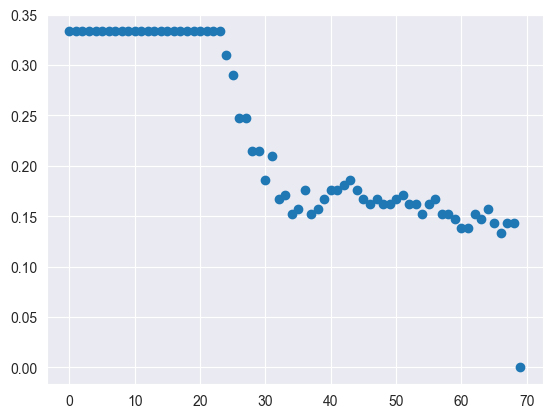

In [96]:
import matplotlib.pyplot as pp
# plot training error
# plt.plot(range(1, 100, 2), train_errors, color='red', marker='o', linestyle='dashed', linewidth=2,
#              markersize=10, label='train_error')
# plt.plot(range(1, 100, 2), test_errors, color='green', marker='.', linestyle='dashed', linewidth=2,
#              markersize=10, label='test_error')
pp.plot(train_errors, 'o')
pp.show()

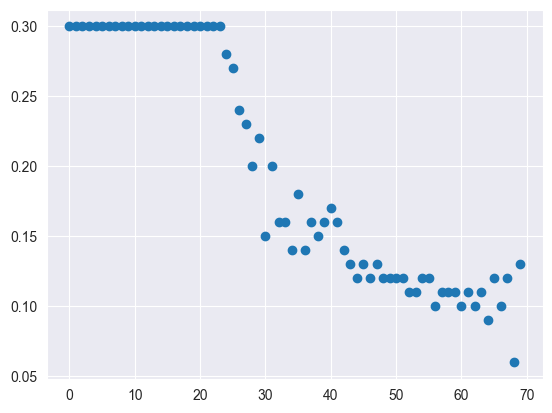

In [97]:
#plot test error
pp.plot(test_errors, 'o')
pp.show()

1c (iii)

In [81]:
### Part 1(c)(iii) ###
N_list = []
N = 10
while N <211:
    N_list.append(N)
    N+=10
N_list

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210]

In [90]:
for n in N_list:
    N_trAB = trAB.head(n - (n//3))
    N_trNO = trNO.head(n//3)
    N_tr = pd.concat([N_trNO, N_trAB])
    trXn = tr.iloc[:, :6].to_numpy()
    teXn = te.iloc[:, :6].to_numpy()
    trYn = tr['class_labels'].to_numpy()
    teYn = te['class_labels'].to_numpy()
    s = 1
    sub_N_list = []
    sub_N_error_test = []
    sub_N_error_train =[]
    while s < n+1:
        sub_N_list.append(s)
        s += 5
    for k_val in sub_N_list:
        classifier = KNeighborsClassifier(n_neighbors = k_val)
        classifier.fit(trXn.astype(int), trYn.astype(int))
        sub_N_train_predict = classifier.predict(trXn)
        sub_N_test_predict = classifier.predict(teXn)
        sub_N_accuracy_test = accuracy_score(y_true = teYn.astype(int), y_pred = sub_N_test_predict)
        sub_N_accuracy_train = accuracy_score(y_true = trYn.astype(int), y_pred = sub_N_train_predict)
        te_error = 1-sub_N_accuracy_test
        tr_error = 1-sub_N_accuracy_train
        sub_N_error_test.append(te_error)
        sub_N_error_train.append(tr_error)